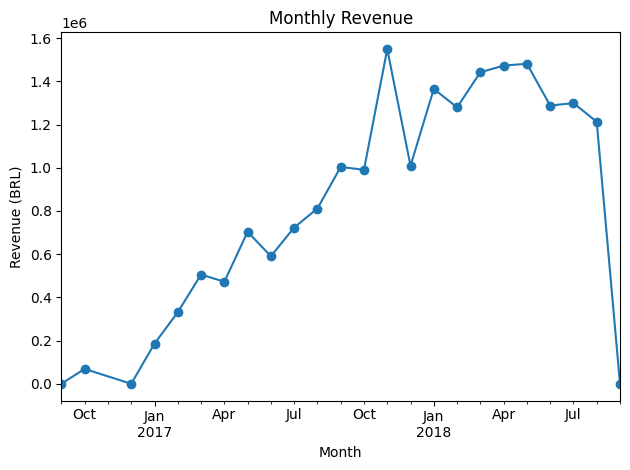

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('olistcleanfinal.csv', parse_dates=['order_purchase_timestamp'])

df['month'] = df['order_purchase_timestamp'].dt.to_period('M')
monthly_revenue = df.groupby('month')['payment_value'].sum()

monthly_revenue.plot(kind='line', marker='o', title='Monthly Revenue')
plt.ylabel('Revenue (BRL)')
plt.xlabel('Month')
plt.tight_layout()
plt.show()

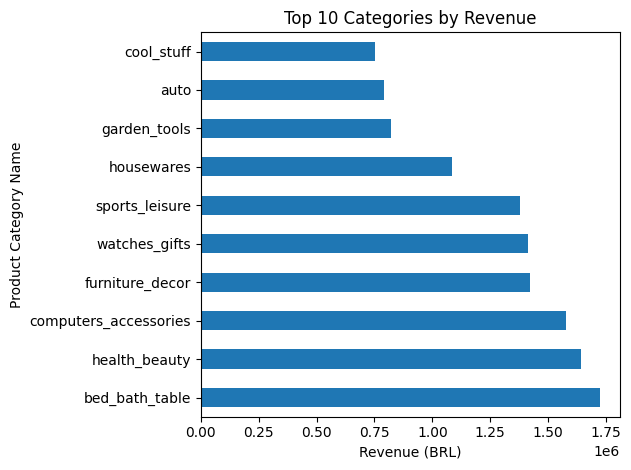

In [10]:
category_revenue = df.groupby('product_category_name_english')['payment_value'].sum().sort_values(ascending=False).head(10)

category_revenue.plot(kind='barh', title='Top 10 Categories by Revenue')
plt.xlabel('Revenue (BRL)')
plt.ylabel('Product Category Name')
plt.tight_layout()
plt.show()

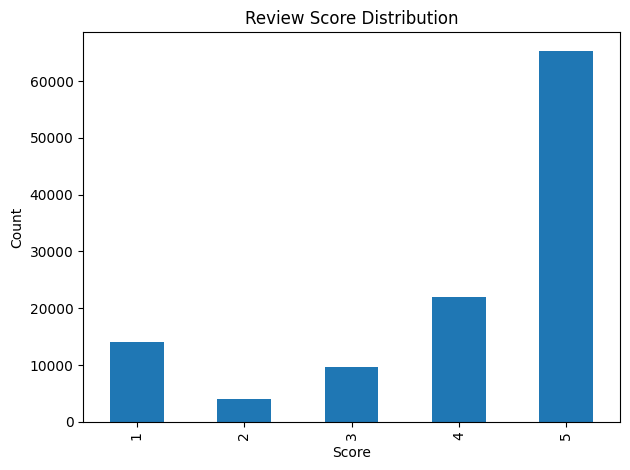

In [12]:
df['review_score'].value_counts().sort_index().plot(kind='bar', title='Review Score Distribution')
plt.xlabel('Score')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

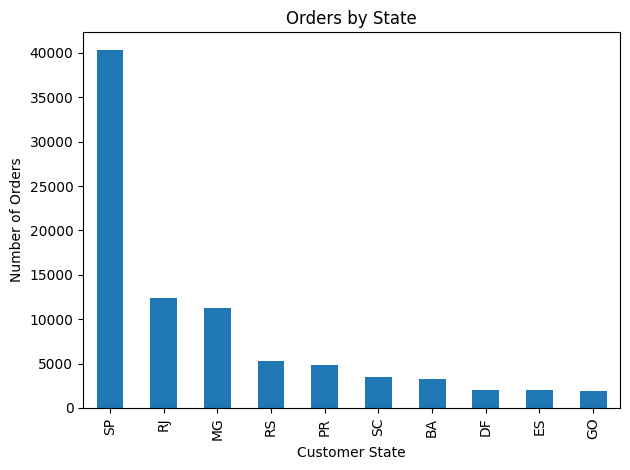

In [14]:
orders_by_state = df.groupby('customer_state')['order_id'].nunique().sort_values(ascending=False).head(10)

orders_by_state.plot(kind='bar', title='Orders by State')
plt.xlabel('Customer State')
plt.ylabel('Number of Orders')
plt.tight_layout()
plt.show()

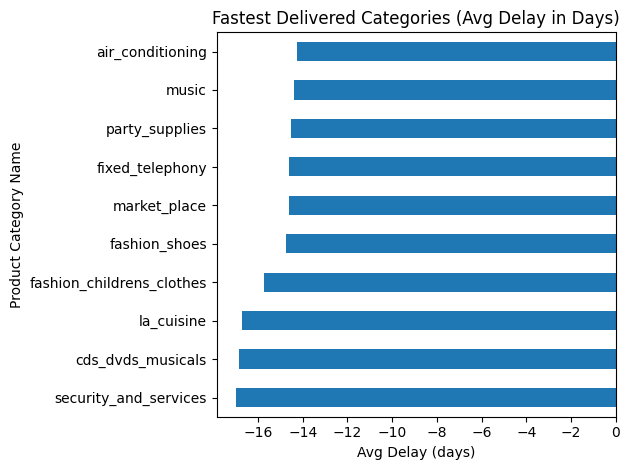

In [16]:
df['delivery_delay'] = (pd.to_datetime(df['order_delivered_customer_date']) - pd.to_datetime(df['order_estimated_delivery_date'])).dt.days
delay_by_cat = df.groupby('product_category_name_english')['delivery_delay'].mean().dropna().sort_values().head(10)

delay_by_cat.plot(kind='barh', title='Fastest Delivered Categories (Avg Delay in Days)')
plt.xlabel('Avg Delay (days)')
plt.ylabel('Product Category Name')
plt.tight_layout()
plt.show()